# Проект "Маркетинговая аналитика для развлекательного приложения Procrastinate Pro+"

**Общее описание проекта:**

Вы — маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Ваша задача — разобраться в причинах и помочь компании выйти в плюс.


Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
- лог сервера с данными об их посещениях,
- выгрузка их покупок за этот период,
- рекламные расходы.

Вам предстоит изучить:
- откуда приходят пользователи и какими устройствами они пользуются,
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент,
- когда расходы на привлечение клиента окупаются,
- какие факторы мешают привлечению клиентов.

### Загрузка данных и подготовка их к анализу

In [1]:
#импортируем все необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime as dt
from datetime import datetime, timedelta
import matplotlib.ticker as ticker
import scipy.stats as stats


%matplotlib inline

%config InlineBackend.figure_format = 'svg'

import warnings
warnings.filterwarnings('ignore')

from pylab import rcParams

rcParams["figure.figsize"] = 10, 6
sns.set_style("whitegrid", {'axes.grid' : True})

In [2]:
#загрузим данные о посещениях
try:
    visits = pd.read_csv('visits_info_short.csv')
except:
    visits = pd.read_csv('https://code.s3.yandex.net/datasets/visits_info_short.csv')

visits

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
...,...,...,...,...,...,...
309896,329994900775,UK,PC,LeapBob,2019-10-31 13:28:12,2019-10-31 14:39:29
309897,334903592310,France,PC,lambdaMediaAds,2019-10-31 22:14:52,2019-10-31 22:39:36
309898,540102010126,Germany,PC,organic,2019-10-31 01:40:48,2019-10-31 01:41:31
309899,308736936846,Germany,Mac,organic,2019-10-31 07:37:34,2019-10-31 07:37:55


In [3]:
#загрузим данные о заказах
try:
    orders = pd.read_csv('orders_info_short.csv')
except:
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders_info_short.csv')

orders

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
...,...,...,...
40207,651604369137,2019-10-31 16:19:07,4.99
40208,275341387049,2019-10-31 01:17:17,4.99
40209,374656616484,2019-10-31 06:17:29,4.99
40210,168548862926,2019-10-31 22:46:19,4.99


In [4]:
#загрузим данные о рекламных расходах
try:
    ad_costs = pd.read_csv('costs_info_short.csv')
except:
    ad_costs = pd.read_csv('https://code.s3.yandex.net/datasets/costs_info_short.csv')

ad_costs

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1
...,...,...,...
1795,2019-10-23,lambdaMediaAds,4.0
1796,2019-10-24,lambdaMediaAds,6.4
1797,2019-10-25,lambdaMediaAds,8.8
1798,2019-10-26,lambdaMediaAds,8.8


In [5]:
#Изучим данные на предмет соответствия типов данных, а также поищем дубликаты и пропуски
print(visits.info())

print(orders.info())

print(ad_costs.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #  

In [6]:
#Сразу приведем все названия столбцов к нижнему регистру
visits.columns = visits.columns.str.lower()
orders.columns = orders.columns.str.lower()
ad_costs.columns = ad_costs.columns.str.lower()

In [7]:
#А также переименуем столбцы, имеющие пробелы между словами, заменив их нижним подчеркиванием
visits = visits.rename(columns={"user id": "user_id",
                      'session start': 'session_start',
                      'session end': 'session_end'})

In [8]:
orders = orders.rename(columns={"user id": "user_id",
                      'event dt': 'event_dt'})

In [9]:
#А также категориальные данные, чтобы корректно проверить дубликаты в дальнейшем
visits['region'] = visits['region'].str.lower()
visits['device'] = visits['device'].str.lower()
visits['channel'] = visits['channel'].str.lower()

ad_costs['channel'] = ad_costs['channel'].str.lower()

In [10]:
#Проверим на полные дубликаты
print(visits.duplicated().sum())
print(orders.duplicated().sum())
print(ad_costs.duplicated().sum())

0
0
0


Итак, пропусков в данных нет, дубликатов нет, сменим тип данных для дат:

In [11]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

orders['event_dt'] = pd.to_datetime(orders['event_dt'])
ad_costs['dt'] = pd.to_datetime(ad_costs['dt']).dt.date

In [12]:
#Еще раз убедимся, что всё прошло корректно
print(visits.info())

print(orders.info())

print(ad_costs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage:

In [13]:
#проверим, что категориальные данные тоже в нижнем регистре
visits.channel.unique()

array(['organic', 'tiptop', 'rocketsuperads', 'yrabbit', 'faceboom',
       'mediatornado', 'adnonsense', 'leapbob', 'wahoonetbanner',
       'opplecreativemedia', 'lambdamediaads'], dtype=object)

Итак, предобработка завершена, данные в целом были корректные, без пропусков и дубликатов. Все столбцы и категориальные данные приведены к нижнему регистру, а также скорректирован тип столбцов с датами.

### Функции для расчёта и анализа LTV, ROI, удержания и конверсии.

С целью дальнейшего изучения данных, напишем функции, которые будем использовать для расчёта и анализа LTV, ROI, удержания и конверсии.

In [14]:
# функция для создания пользовательских профилей
def get_profiles(sessions, orders, events, ad_costs, event_names=[]):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
    for event in event_names:
        if event in events['event_name'].unique():
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)
    

    return profiles


In [15]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [16]:

# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [17]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

А также зададим функции для построения графиков:

In [18]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [19]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [20]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [21]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Исследовательский анализ данных

1. Для начала составим профили пользователей, воспользовавшись ранее написанной функцией:

In [22]:
events = None
profiles = get_profiles(visits, orders, events, ad_costs)

profiles.head(5)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,faceboom,mac,united states,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,faceboom,iphone,united states,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iphone,france,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,adnonsense,pc,germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,yrabbit,iphone,united states,2019-10-02,2019-10-01,False,0.230769


In [23]:
#Определим минимальную и максимальную даты привлечения пользователей
print('Минимальная дата привлечения пользователей' , profiles['dt'].min())
print('Максимальная дата привлечения пользователей' , profiles['dt'].max())

Минимальная дата привлечения пользователей 2019-05-01
Максимальная дата привлечения пользователей 2019-10-27


Данные нам предоставлены с 1 мая 2019 года по 27 октября 2019.

2. Посмотрим, на распределение платящих и неплатящих пользователей по странам

In [24]:
#Посмотрим на всех пользователей в разбивке по странам
profiles.groupby(['payer','region'])\
        .agg(users_count = ('region','count'))\
        .sort_values(by = 'users_count', ascending = False)

users_count
payer region                    
False united states        93100
      uk                   16875
      france               16787
      germany              14365
True  united states         6902
      uk                     700
      france                 663
      germany                616

In [25]:
#Найдем долю платящих для каждой страны
country_group = (profiles
        .pivot_table(index = 'region', values = 'payer', aggfunc = ['count', 'sum', 'mean'])
        .reset_index()
        .rename(columns = {'count':'all_users', 'sum':'paying_users', 'mean':'ratio'})
        .droplevel(1, axis = 1)
        .sort_values(by = 'ratio', ascending = False)
        .style.format({'ratio':'{:.2%}'})
)
country_group

,region,all_users,paying_users,ratio
3,united states,100002,6902,6.90%
1,germany,14981,616,4.11%
2,uk,17575,700,3.98%
0,france,17450,663,3.80%


Видим, что больше всего платящих пользователей приходят из США (6.9%), в то время как у остальных стран 3-4%. Неплатящих пользователей из США также в разы больше. Таким образом можно полагать, что основной аудиторией являются пользователи из США.

3. Посмотрим, с каких устройств клиенты посещают приложение:

In [26]:
#посмотрим на всех пользователей по устройствам
profiles.groupby(['payer','device'])\
        .agg(users_count = ('region','count'))\
        .sort_values(by = ['payer','users_count'], ascending = False)

users_count
payer device              
True  iphone          3382
      android         2050
      mac             1912
      pc              1537
False iphone         51097
      android        32982
      pc             28918
      mac            28130

In [27]:
#Проверим, долю привлеченных платящих пользователей в зависимости от устройства
device_group = (profiles
        .pivot_table(index = 'device', values = 'payer', aggfunc = ['count', 'sum', 'mean'])
        .reset_index()
        .rename(columns = {'count':'all_users', 'sum':'paying_users', 'mean':'ratio'})
        .droplevel(1, axis = 1)
        .sort_values(by = 'ratio', ascending = False)
        .style.format({'ratio':'{:.2%}'})
)
device_group

,device,all_users,paying_users,ratio
2,mac,30042,1912,6.36%
1,iphone,54479,3382,6.21%
0,android,35032,2050,5.85%
3,pc,30455,1537,5.05%


Итак, больше всего платящих пользователей заходят с айфонов, андроид на втором месте по приоритету.

Однако доля платящих относительно всех пользователей выше у Mac и Iphone.

4. Изучим рекламные источники привлечения

In [28]:
#посмотрим на всех пользователей по каналам привлечения
profiles.groupby(['payer','channel'])\
        .agg(users_count = ('region','count'))\
        .sort_values(by = ['payer','users_count'], ascending = False)

users_count
payer channel                        
True  faceboom                   3557
      tiptop                     1878
      organic                    1160
      wahoonetbanner              453
      adnonsense                  440
      rocketsuperads              352
      leapbob                     262
      opplecreativemedia          233
      lambdamediaads              225
      yrabbit                     165
      mediatornado                156
False organic                   55279
      faceboom                  25587
      tiptop                    17683
      opplecreativemedia         8372
      leapbob                    8291
      wahoonetbanner             8100
      mediatornado               4208
      yrabbit                    4147
      rocketsuperads             4096
      adnonsense                 3440
      lambdamediaads             1924

In [29]:
#Проверим распределение платящих пользователей в зависимости от рекламного канала
channel_group = (profiles
        .pivot_table(index = 'channel', values = 'payer', aggfunc = ['count', 'sum', 'mean'])
        .reset_index()
        .rename(columns = {'count':'all_users', 'sum':'paying_users', 'mean':'ratio'})
        .droplevel(1, axis = 1)
        .sort_values(by = 'ratio', ascending = False)
        .style.format({'ratio':'{:.2%}'})
)
channel_group

,channel,all_users,paying_users,ratio
1,faceboom,29144,3557,12.20%
0,adnonsense,3880,440,11.34%
2,lambdamediaads,2149,225,10.47%
8,tiptop,19561,1878,9.60%
7,rocketsuperads,4448,352,7.91%
9,wahoonetbanner,8553,453,5.30%
10,yrabbit,4312,165,3.83%
4,mediatornado,4364,156,3.57%
3,leapbob,8553,262,3.06%
5,opplecreativemedia,8605,233,2.71%


Итак, по таблице видим, какие каналы принесли бОльшие доли платящих пользователей.

12,2% стали платящими пользователями среди всех привлеченных через канал Faceboom, 11,34% через канал Adnonsense, на третьем месте lambdamediaads.

### Маркетинг

1. Посчитаем общую сумму расходов на маркетинг:

In [30]:
#посчитаем из исходной таблицы
total_sum_adv = round(ad_costs.costs.sum(), 2)
total_sum_adv

105497.3

Сумма расходов на рекламу выходит $105497

2. Посмотрим, сколько денег потратили на каждый источник рекламы:

In [31]:
channel = profiles.groupby('channel')\
        .agg({'acquisition_cost':'sum'})\
        .sort_values(by = 'acquisition_cost', ascending = False)
channel['cost_share, %'] = round((channel['acquisition_cost']/channel['acquisition_cost'].sum())*100, 2)
channel

,acquisition_cost,"cost_share, %"
channel,,
tiptop,54751.30,51.90
faceboom,32445.60,30.75
wahoonetbanner,5151.00,4.88
adnonsense,3911.25,3.71
opplecreativemedia,2151.25,2.04
rocketsuperads,1833.00,1.74
leapbob,1797.60,1.70
lambdamediaads,1557.60,1.48
mediatornado,954.48,0.90


Видим, что самый большой бюджет был заложен на Tiptop, примерно в полтора раза меньше на Faceboom. Остальные источники были закуплены по минимуму.

Мы помним, что платящих клиентов гораздо больше пришло из Faceboom'а, а значит, с рекламой Tiptop'а возможно что-то не так.

3. Посмотрим на динамику изменения расходов во времени (по неделям и месяцам) по каждому источнику.

In [32]:
#Для последующего построения графика требуется создать новые столбцы с неделми и месяцами
ad_costs['week'] = pd.to_datetime(ad_costs['dt']).dt.isocalendar().week
ad_costs['month'] = pd.to_datetime(ad_costs['dt']).dt.month

In [33]:
#Создадим сводные таблицы по расходам на рекламу по неделям и месяцам
costs_per_week = ad_costs.pivot_table(index = 'week', columns = 'channel', values = 'costs', aggfunc = 'sum')
costs_per_month = ad_costs.pivot_table(index = 'month', columns = 'channel', values = 'costs', aggfunc = 'sum')

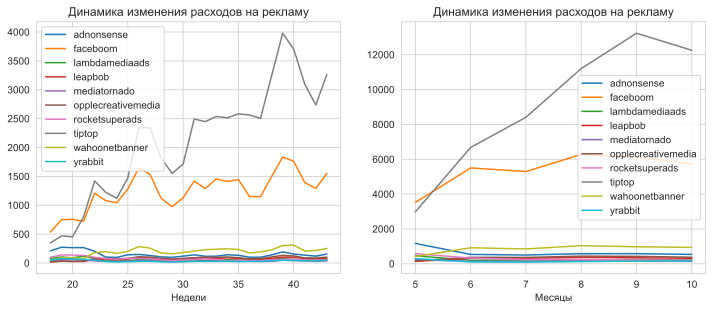

In [34]:
#Задаем общую подложку
plt.figure(figsize=(12, 10))

#В первой ячейке строим кривые динамики расходов по неделям
ax1 = plt.subplot(2, 2, 1)
costs_per_week.plot(grid=True, ax=ax1)
plt.legend()
plt.xlabel('Недели')
plt.title('Динамика изменения расходов на рекламу')

#Во второй ячейке строим кривые динамики расходов по месяцам
ax2 = plt.subplot(2, 2, 2)
costs_per_month.plot(grid=True, ax=ax2)
plt.legend()
plt.xlabel('Месяцы')
plt.title('Динамика изменения расходов на рекламу')

plt.show()


Итак, по графику мы видим, что сначала поступательно увеличивались закупки рекламы у Tiptop и Faceboom'а.

Однако после первого месяца видно, что у Faceboom'а дальнейшие закупки были всё же более стабильными, а у Tiptop'а постоянно росли. 

Остальные рекламодатели были в равной степени обделены.

4. Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника.


In [35]:
profiles.groupby('channel')\
        .agg({'acquisition_cost':'mean'})\
        .sort_values(by = 'acquisition_cost', ascending = False)

,acquisition_cost
channel,
tiptop,2.799003
faceboom,1.113286
adnonsense,1.008054
lambdamediaads,0.724802
wahoonetbanner,0.602245
rocketsuperads,0.412095
opplecreativemedia,0.250000
yrabbit,0.218975
mediatornado,0.218717


Видим,что стоимость привлечения одного клиента гораздо больше для Tiptop по сравнению с другими (более $2.7), далее идут Faceboom и Adnonsense по цене около 1 доллара. 

### Окупаемость рекламы

Для дальнейшего анализа окупаемости рекламы зададим горизонт и момент анализа.

In [36]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа

1. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI с помощью заранее написанных функций.

Исключим пользователей, которые пришли без помощи рекламы.

In [37]:
profiles_adv = profiles.query('channel != "organic"')
profiles_adv

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,faceboom,mac,united states,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,faceboom,iphone,united states,2019-07-09,2019-07-01,False,1.107237
3,22593348,2019-08-22 21:35:48,adnonsense,pc,germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,yrabbit,iphone,united states,2019-10-02,2019-10-01,False,0.230769
7,46006712,2019-06-30 03:46:29,adnonsense,android,france,2019-06-30,2019-06-01,True,1.008000
...,...,...,...,...,...,...,...,...,...
149999,999942424543,2019-05-24 21:03:26,tiptop,iphone,united states,2019-05-24,2019-05-01,False,1.900000
150001,999949280903,2019-08-12 06:47:27,faceboom,mac,united states,2019-08-12,2019-08-01,False,1.117838
150003,999956196527,2019-09-28 08:33:02,tiptop,iphone,united states,2019-09-28,2019-09-01,False,3.500000
150005,999976332130,2019-07-23 02:57:06,tiptop,iphone,united states,2019-07-23,2019-07-01,False,2.600000


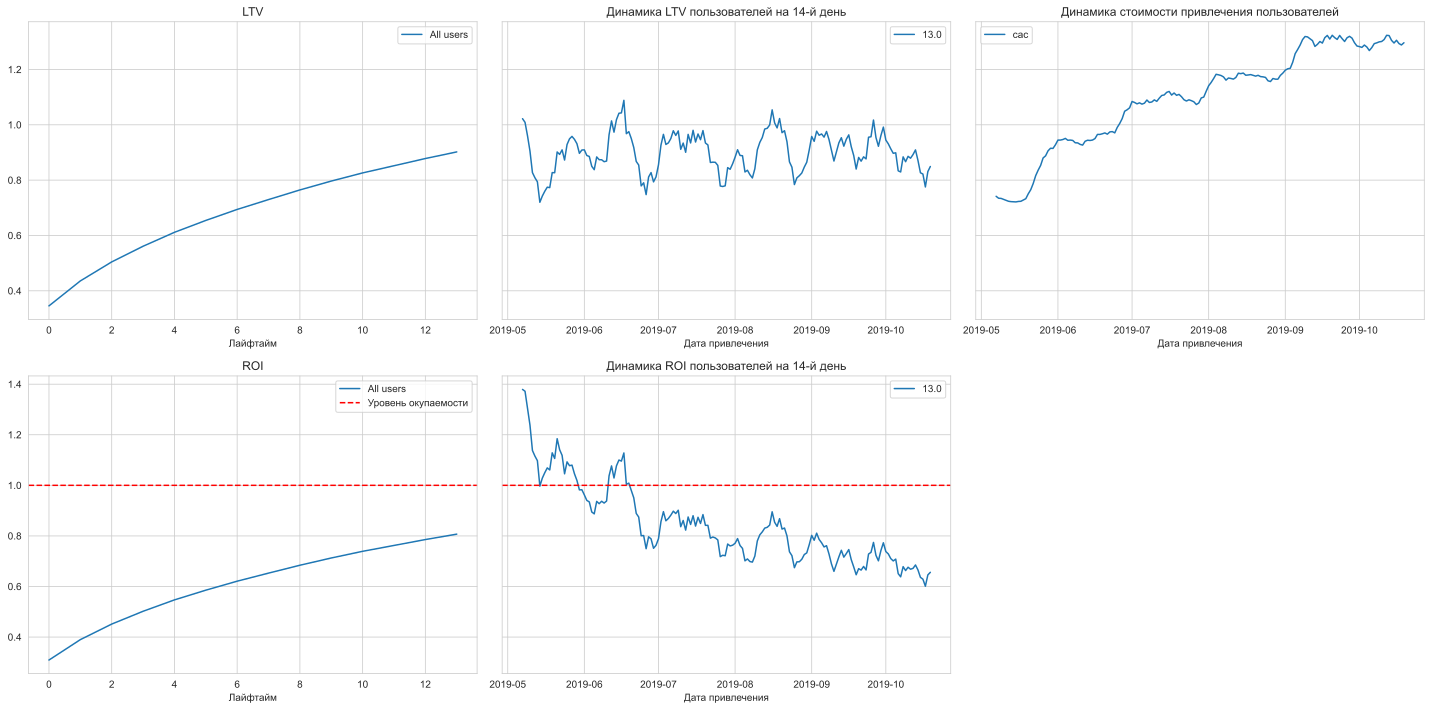

In [38]:
# считаем LTV и ROI только для пользователей, пришедших из рекламных источников
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_adv, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

Видим, что стоимость привлечения клиентов значительно выросла с середины мая 2019 и далее продолжала свой рост. При этом реклама окупается всё меньше с июня 2019, а к июлю ROI уже стабильно ниже уровня окупаемости. LTV при этом медленно растет, но за 14 дней не доходит до границы окупаемости.

2. Проверим конверсию пользователей и динамику её изменения. То же самое сделаем с удержанием пользователей. Построим и изучим графики конверсии и удержания.

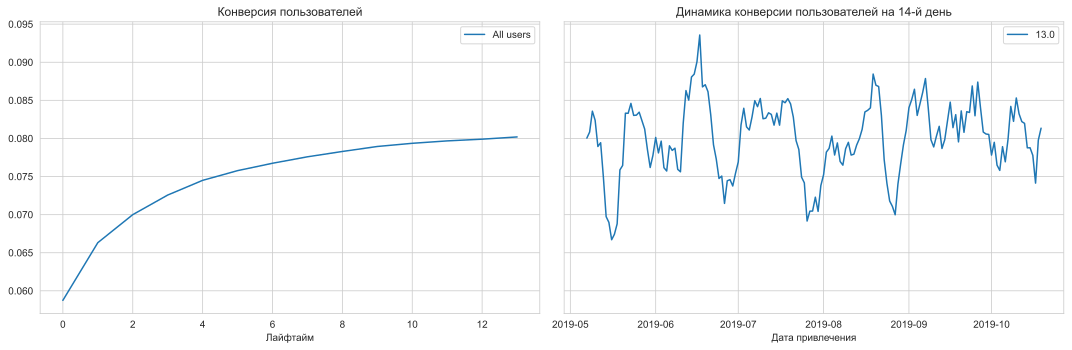

In [39]:
# смотрим конверсию

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_adv, orders, observation_date, horizon_days
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

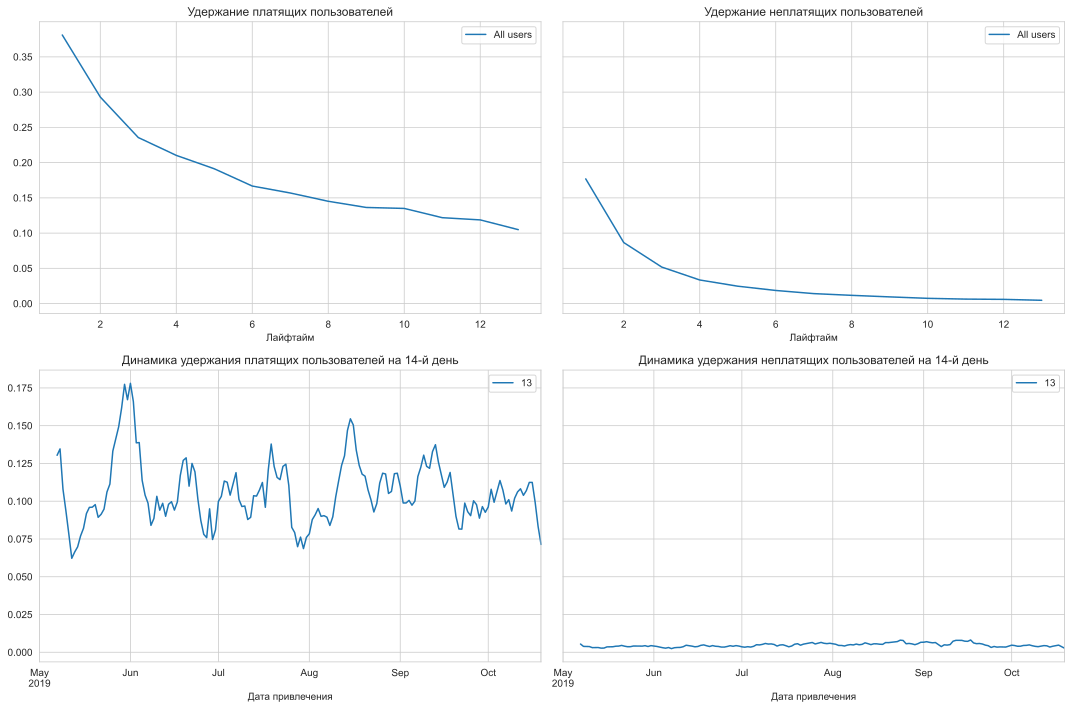

In [40]:
# смотрим удержание

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_adv, visits, observation_date, horizon_days
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Итак, однозначные выводы сделать сложно. Конверсия и удержание в целом выглядят неплохо.

Скорее всего проблема скрывается где-то глубже.

3. Попробуем посмотреть окупаемость рекламы **с разбивкой по устройствам**. 

Снова построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

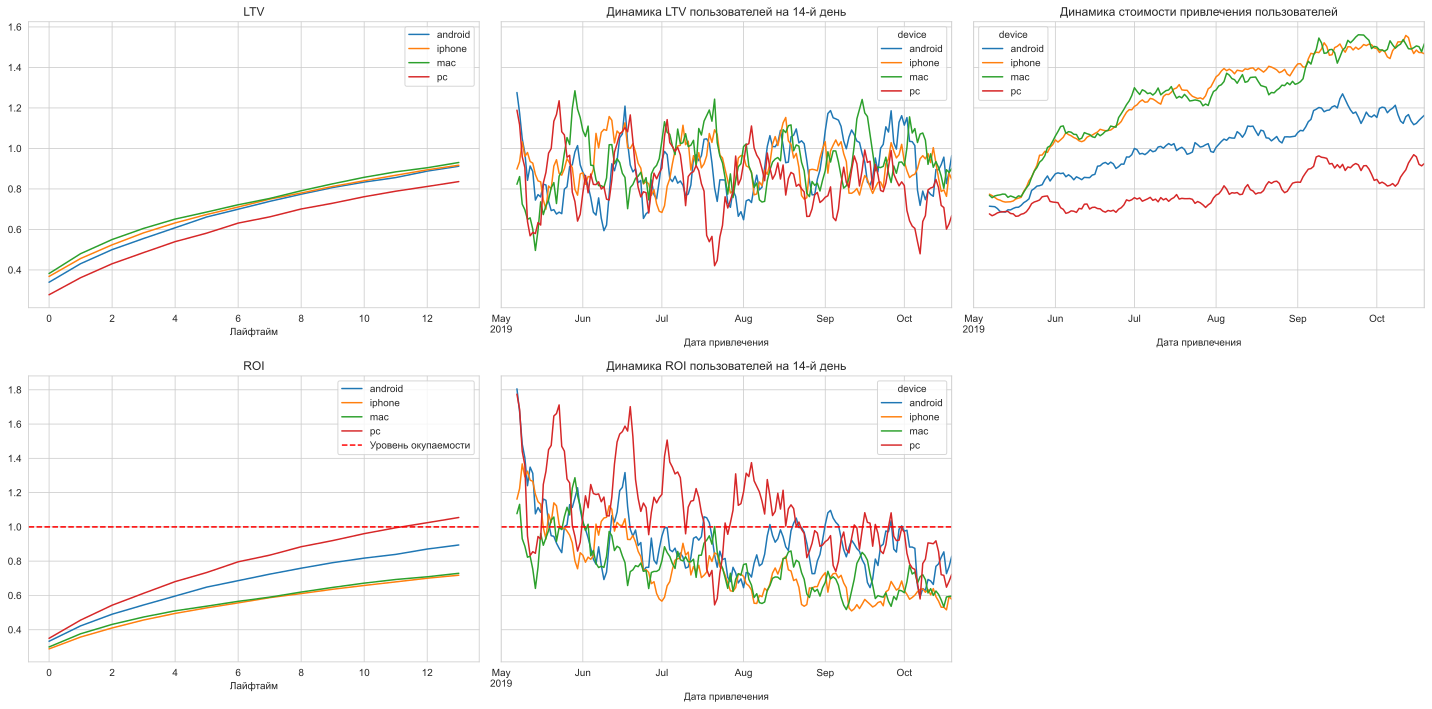

In [41]:
# считаем LTV и ROI с разбивкой по устройствам
dimensions = ['device']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_adv, orders, observation_date, horizon_days, dimensions = dimensions
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

Видим, что реклама не окупается ни на каких устройствах. PC незначительно окупается в последний момент скорее всего из-за самой дешевой стоимости привлечения таких пользователей.

4. Посмотрим на окупаемость рекламы с разбивкой по странам.

Снова построим графики:

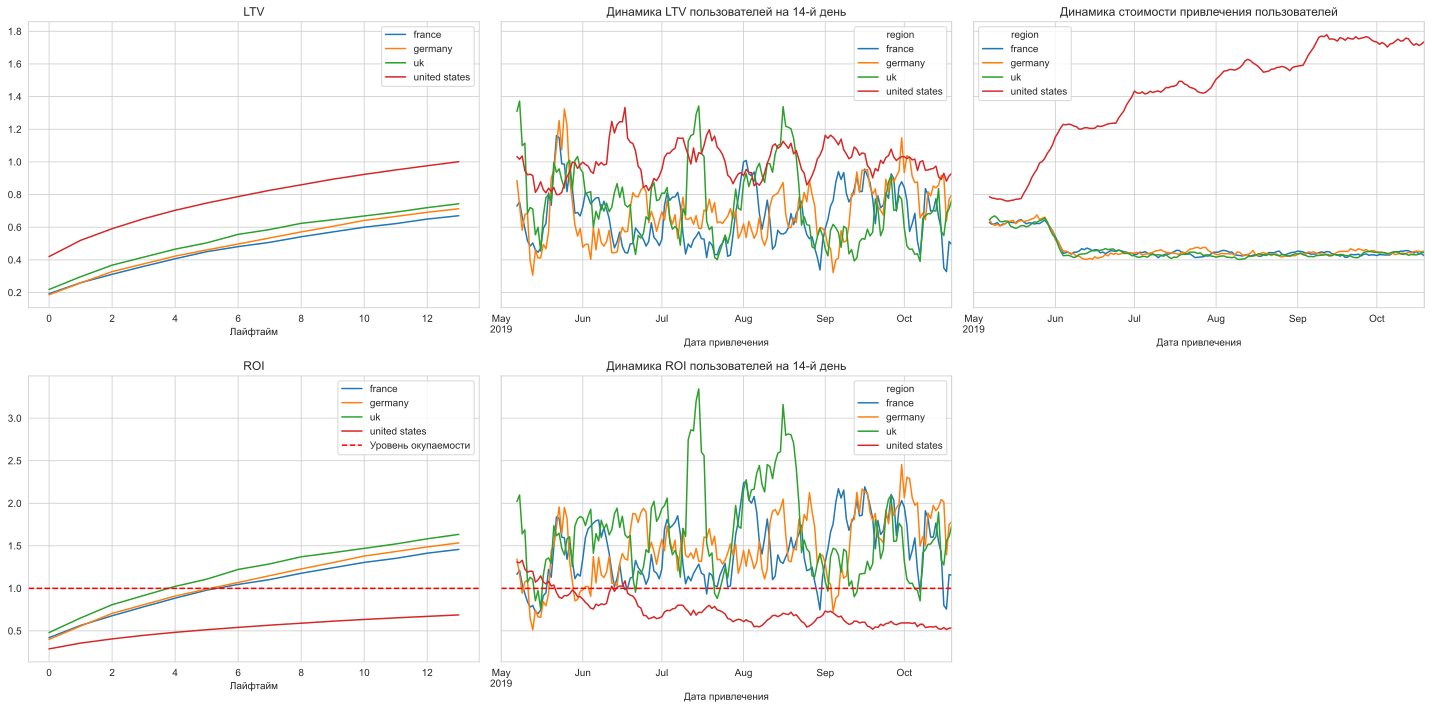

In [42]:
# считаем LTV и ROI с разбивкой по странам
dimensions = ['region']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_adv, orders, observation_date, horizon_days, dimensions = dimensions
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

Графики с разбивкой по странам говорят нам о том, что колоссальные средства тратятся на привлечение пользователей из США, однако реклама перестала окупаться с середины мая 2019. 

При этом LTV у американских пользователей гораздо выше по сравнению с другими странами.

5. Посмотрим на графики окупаемости рекламы с разбивкой по рекламным каналам.

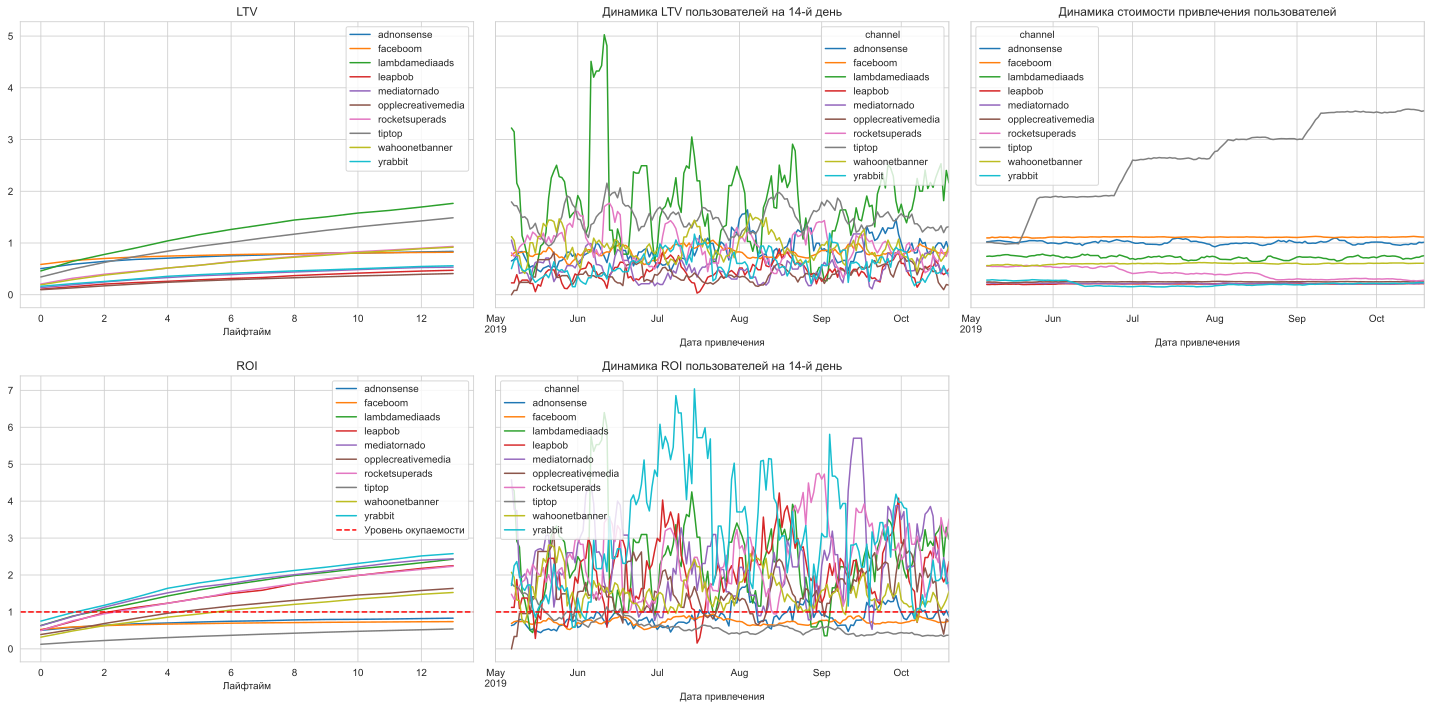

In [43]:
# считаем LTV и ROI с разбивкой по рекламным каналам
dimensions = ['channel']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_adv, orders, observation_date, horizon_days, dimensions = dimensions
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

Видим, что два наших лидера по закупке рекламы Tiptop и Faceboom не окупаются. При этом стоимость привлечения с Tiptop'а невероятно растет с каждым месяцем, а остальные относительно стабильны.

Попробуем еще раз посмотреть на конверсию и удержание, но в этот раз с разбивкой по странам, устройствам и каналам привлечения. Возможно это даст нам дополнительные объяснения происходящему

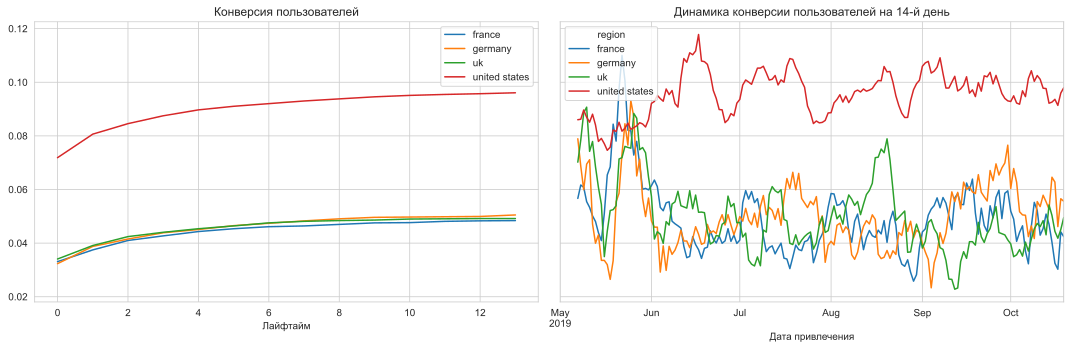

In [44]:
# смотрим конверсию по странам
dimensions = ['region']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_adv, orders, observation_date, horizon_days, dimensions = dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

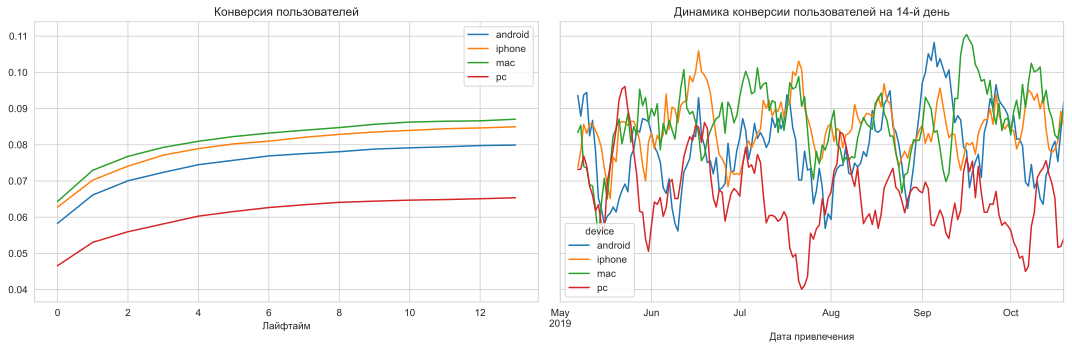

In [45]:
# смотрим конверсию по устройствам
dimensions = ['device']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_adv, orders, observation_date, horizon_days, dimensions = dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

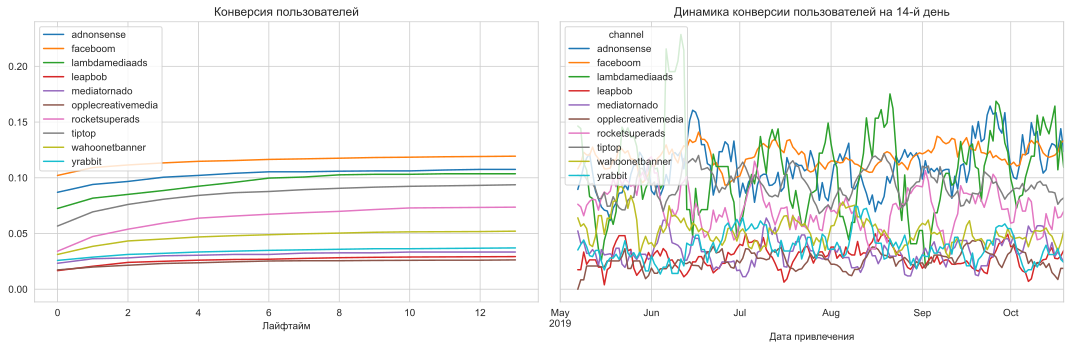

In [46]:
# смотрим конверсию по каналам привлечения
dimensions = ['channel']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_adv, orders, observation_date, horizon_days, dimensions = dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

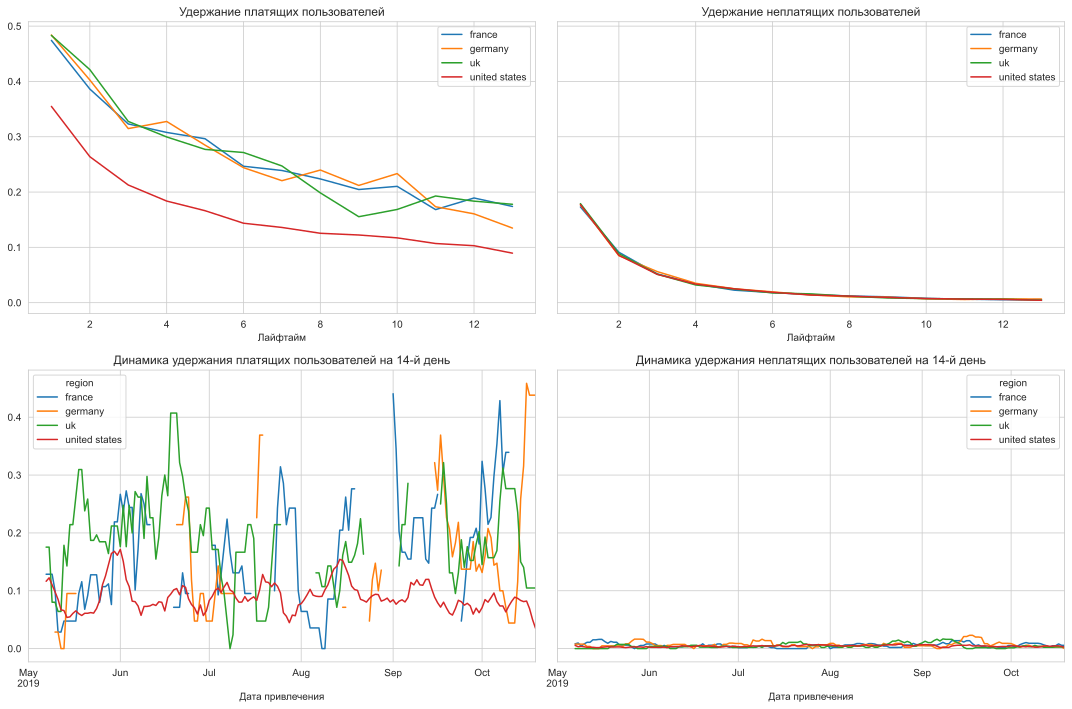

In [47]:
# смотрим удержание по странам
dimensions = ['region']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_adv, visits, observation_date, horizon_days, dimensions = dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

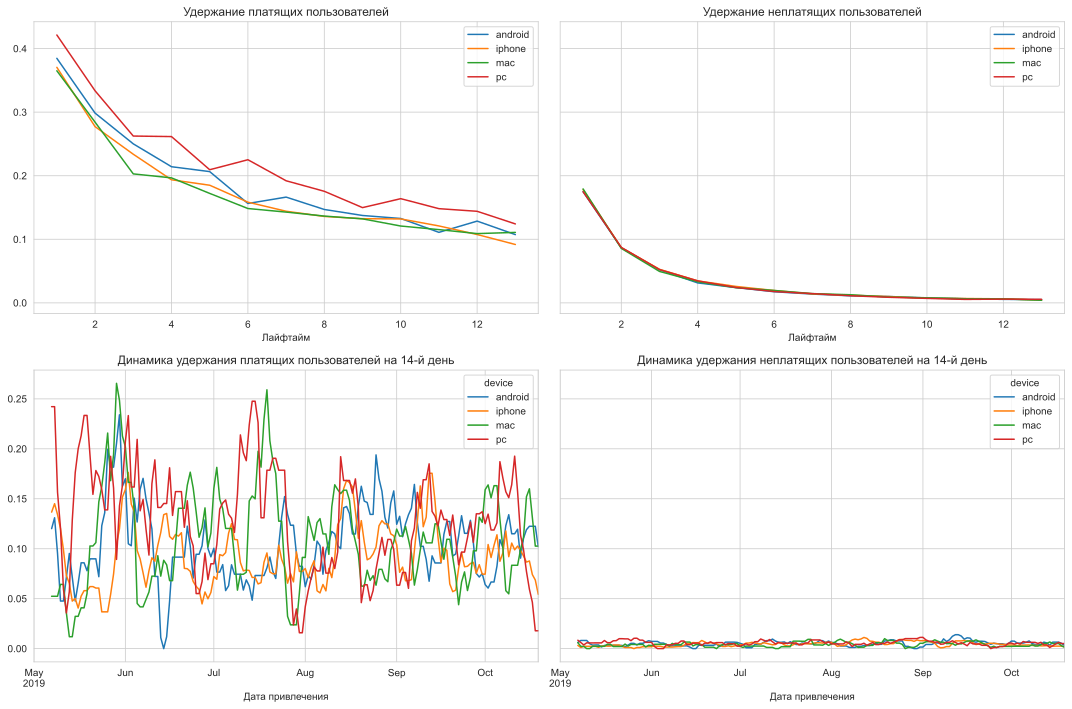

In [48]:
# смотрим удержание по устройствам
dimensions = ['device']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_adv, visits, observation_date, horizon_days, dimensions = dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

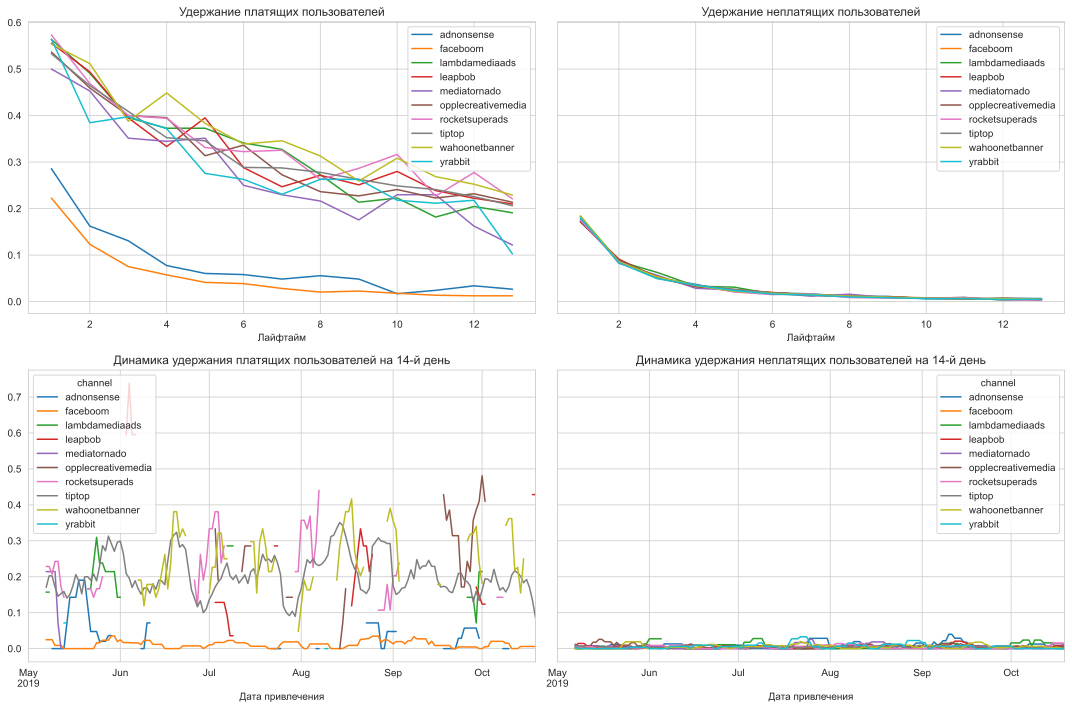

In [49]:
# смотрим удержание по каналам привлечения
dimensions = ['channel']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_adv, visits, observation_date, horizon_days, dimensions = dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Новые графики позволяют нам сделать дополнительные выводы о конверсии и удержании. 

Важно отметить, что конверсия пользователей из США значительно выше, чем у пользователей из других стран. Среди устройств по конверсии лидируют Mac и Iphone, а среди каналов привлечения хорошие результаты показывают Faceboom, Adnonsense Lambdamediaads

Что касается удержания, то мы видим, что серьезно проседает удержание у тех же пользователей из США, а также у пользователей из каналов привлечения Faceboom и Adnonsense.

 - Итак, мы видим, что реклама, направленная на привлечение пользователей в целом не окупается с июля 2019 года. 
 В это же время наблюдается сильный рост закупки рекламы в Tiptop. Однако мы видим на графике динамики, что данный канал не окупался практически с самого начала. Скорее всего реклама закупалась вслепую всё в больших и больших объемах, однако не была эффективна уже с середины мая. При этом цена на Tiptop, очевидно, росла с каждым месяцем.
 
 
 - В ходе данного анализа мы также обнаружили, что для привлечения клиентов из США тратятся колоссальные средства, однако они не окупаются. Несмотря на высокую конверсию американские пользователи имеют очень слабые показатели по удержанию, именно поэтому деньги на них расходуются впустую. Это же происходит и с клиентами из рекламных каналов Faceboom и Adnonsense: они показывают хорошую конверсию, но плохое удержание. Также следует отметить тот факт, что в середине мая рекламные бюджеты для европейских стран снизили, однако прибыли от этих клиентов не уменьшилось. У этих клиентов хорошее удержание, возможно следует рассотреть повышение рекламного бюджета для данного сегмента.
 
 
 - Итак, скорее всего проблемы окупаемости рекламы заключаются в совокупности факторов, а именно в расходе рекламного бюджета с ориентацией на два основных канала привлечения (один из которых очень дорогой (Tiptop), а второй имеет низкие показатели удержания) и при этом общем плохом удержании клиентов ключевой страны США.
 
 
- В качестве совета можно рекомендовать диверсифицировать рекламный бюджет, отдавая предпочтения наиболее окупаемым на сегодняшний день площадкам - yrabbit, mediatornado, lambdamediaads. Однако в первую очередь следует проводить мероприятия по удержанию клиентов как для проблемной по удержанию страны - США, так и для двух платформ Faceboom и Adnonsense. Также можно посоветовать рекламному отделу закупать рекламу не только для рынка США, но и для европейского рынка. Кроме того можно увеличить рекламу для устройств Андроид, посколькую от них тоже приходят платящие клиенты (2 место после Айфон). Однако действовать вслепую не стоит, рекомендуется также промежуточно анализировать окупаемость рекламы по ходу закупок.


### Выводы

Итак, в ходе данного проекта мы проанализировали окупаемость рекламы для развлекательного приложения Procrastinate Pro+. Были выявлены основные причины неудач и убытков компании.


Выяснилось, что компания на протяжении нескольких месяцев закупала рекламу, делая ставку на два основных источника, один из которых (Tiptop) из месяца в месяц обходился все дороже. Однако из-за плохого удержания пользователей из ключевой страны - США и пользователей из второго основного источника рекламы - Faceboom реклама не окупалась.

Рекомендовано:
- провести мероприятия по удерживанию пользователей из США, а также каналов Faceboom и Adnonsense
- диверсифицировать рекламный бюджет
- увеличить рекламу для устройств Андроид
- закупать больше рекламы для европейского рынка 
- анализировать окупаемость рекламы по ходу закупок.